In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1. Get the data**

In [3]:
#download reference
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.fna.gz
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz

--2022-10-26 11:17:53--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.11, 2607:f220:41f:250::228, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1379902 (1.3M) [application/x-gzip]
Saving to: ‘GCF_000005845.2_ASM584v2_genomic.fna.gz’

GCF_000005845.2_ASM 100%[===================>]   1.32M  --.-KB/s    in 0.04s   

2022-10-26 11:17:53 (29.5 MB/s) - ‘GCF_000005845.2_ASM584v2_genomic.fna.gz’ saved [1379902/1379902]

--2022-10-26 11:17:53--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.11, 2607:f220:41f:250::228, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|

In [4]:
# CODE BLOCK FOR ANASTASIA
!cp /content/drive/MyDrive/BIOINF/Practice/Project_1/amp_res_1.fastq.gz /amp_res_1.fastq.gz
!cp /content/drive/MyDrive/BIOINF/Practice/Project_1/amp_res_2.fastq.gz /amp_res_2.fastq.gz

In [5]:
!gunzip /amp_res_1.fastq.gz 
!gunzip /amp_res_2.fastq.gz

In [6]:
!gunzip /content/GCF_000005845.2_ASM584v2_genomic.fna.gz
!gunzip /content/GCF_000005845.2_ASM584v2_genomic.gff.gz

##**2. Inspect raw sequencing data manually**


In [ ]:
!head -20 /amp_res_1.fastq

@SRR1363257.37 GWZHISEQ01:153:C1W31ACXX:5:1101:14027:2198 length=101
GGTTGCAGATTCGCAGTGTCGCTGTTCCAGCGCATCACATCTTTGATGTTCACGCCGTGGCGTTTAGCAATGCTTGAAAGCGAATCGCCTTTGCCCACACG
+
@?:=:;DBFADH;CAECEE@@E:FFHGAE4?C?DE<BFGEC>?>FHE4BFFIIFHIBABEECA83;>>@>@CCCDC9@@CC08<@?@BB@9:CC#######
@SRR1363257.46 GWZHISEQ01:153:C1W31ACXX:5:1101:19721:2155 length=101
GTATGAGGTTTTGCTGCATTCTCTGNGCGAATATTAACTCCNTNNNNNTTATAGTTCAAAGCAAGTACCTGTCTCTTATACACATCTCCGAGCCCACGAGC
+
@@<?=D?D==?<AFGDF+AIHEACH#22<:?E8??:9??GG#0#####000;CF=C)4.==CA@@@)=7?C7?E37;3@>;;(.;>AB#############
@SRR1363257.77 GWZHISEQ01:153:C1W31ACXX:5:1101:5069:2307 length=101
GCTTCTCTTAACTGAGGTCACCATCATGCCGTTAAGTCCCTACCTCTCTTTTGCCGGTAACTGTTCCGCCGCGATTGCCTTTTATCTGTCTCTTATACACC
+
??<DBD;4C2=<BB>:AC;<CF<CE@FE9@E1C@891CD*9:?:3D@DD4?D<DD:0;@A=AEIDDA##################################
@SRR1363257.78 GWZHISEQ01:153:C1W31ACXX:5:1101:5178:2440 length=101
GCATAAGGACGATCGCTCCAGAGTAAAATAAATACGCGCATGTGATACTCACAATACCAATGGTGAAGTTACGGGACTTAAACAAACTGAGATCAAGAATC
+
CCCF

In [ ]:
!head -20 /amp_res_2.fastq

@SRR1363257.37 GWZHISEQ01:153:C1W31ACXX:5:1101:14027:2198 length=101
GATCTAAGCTGAAGCCAGGCCAAAGTTTGACGATTGGTGCAGGCAGTAGCGCACAGCGACTGGCAAACAACAGCGATAGCATTACGTATCGTGTGCGCAAA
+
???BDB:DFHBFD@9;;+A;AFGH;ABHFHHGE@9:B:??@D>@;F?D8<<F8AA9EHHD8'..;5?A?A992(',(59CC3@C>22::A238+2>B<>B<
@SRR1363257.46 GWZHISEQ01:153:C1W31ACXX:5:1101:19721:2155 length=101
GTACTTGCTTTGNACTATAATATGCACGGAGNTAATATTCGCTCAGAGAATGCAGCAAAACCTCATACCTGTCTCTTATACACATCTGACGCTGCCGACGA
+
;@@DB?B;CFBB#2<:CB:FH<C@:<A?C::#1:86:BG9:8?8688?888EBF;783)=6-7=CC;ECD);?7;;>>AE;>(5;->AC@;B@;8?#####
@SRR1363257.77 GWZHISEQ01:153:C1W31ACXX:5:1101:5069:2307 length=101
ATAATAGGCAATCGCGTCGGAACAGTTACCGGCCAAAGAGAGGCAGGGACTTAACGGCATGATGGTGACCTCAGTTAAGAGAAGCCTGTCTCTTATACACA
+
+=?;:2,+A++AC:C:2@F6:CD:B09B?4)8@''8=))8=;=((5=4@?;@6;@?@BB;(535::>:>3(::(44:@::@3((9<32+::@(4@4+:>C3
@SRR1363257.78 GWZHISEQ01:153:C1W31ACXX:5:1101:5178:2440 length=101
ATATTAACAGTAGTATCAGTTATTTCTCTGATCTCTTTAGTCATTTGGGAGTCGACCTCAGAGAACCCGATTCTTGATCTCAGTTTGTTTAAGTCCCGTAA
+
BCCF

In [7]:
!gunzip /content/GCF_000005845.2_ASM584v2_genomic.fna.gz

gzip: /content/GCF_000005845.2_ASM584v2_genomic.fna.gz: No such file or directory


In [ ]:
!cat /content/GCF_000005845.2_ASM584v2_genomic.fna
#the file contains a header line marked by a '>' character ('>NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome') and DNA sequence lines

Streaming output truncated to the last 5000 lines.
TGGACGATGTTGCTGATTCAGCGGATCGTCAAAGTCTTTCTCACCCGTGGCCATATCCCAGCCGCGATCGATTAAAATTT
CCGCGCCATCTTTGTAATAACGCGCAGACAGCGTACGCGTGACGCTTTGCGGATTGTTCGGATAAACCATTCCATAACCG
AAGCCGTTACCGCGCGCCTGATGTTTTTTCGCATATCGATAGAGGTACTTCCACAGCACCGGCGTCAGGATATATTTCGC
CTCGACCATCGGGTCCAACAGCTGCGCCAGCGTCACTCGCTGCGCAGGGAAACATTCGCTGATATCACGCAGGGTAAAAT
CGGCTTTCAGATTCAGATCGCGACGAAAACCCACCAGCACGATGCGTTCACGGTGCTGCGGCAGAAAATGTTTGCCGTCG
ATGATTTTCGGATCGTCTGGCCCATTATCTTCTGCATCAGCCACGTCATAGCCCAGTTCGTCCAGCGTCTGCATGATGAT
GCGGAACGTTTTACCCTGGTCGTGACTTTTCAGGTTTTTGACGTTTTCGAGCACAAACATCGCCGGACGACGCGCGTCGA
TAATGCGTACCACATCAAAAAACAGCGTGCCCTGGGTATCGCAGGCAAAACCGTGCGCCCGCCCGAGCGAGTTCTTTTTC
GATACGCCAGCCAGCGAAAATGGCTGACAAGGGAAACCGGCCAGTAAAACATCGTGTTCAGGAATGTGTTGACGAATATG
TTCCGCCGCCGCCTCATCACTCACGCCTTCTTTATGGCTGAGGGTGATGTCGCGGATATCTTCATTAAAATGATGCGTCG
CCGGATCGCAATAATGGTTGGCTTTATAAGTGCGTACCGCATGTTTGTTCCATTCGCTGGTAAACACGCACTGTCCGCCA
ATCGATTCAAAACCGCGACGGATGCCGCCAATTCCGGCGAATAGATCGATAAAGCGAA

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
##check how many reads are in each fastq file
!wc -l /amp_res_1.fastq
#output:
#1823504 /amp_res_1.fastq

1823504 /amp_res_1.fastq


In [ ]:
!wc -l /amp_res_2.fastq
#output:
#1823504 /amp_res_2.fastq

1823504 /amp_res_2.fastq


In [ ]:
# From the line count, use what you know about the fastq format to calculate 
# the number of reads in each file, and record in your lab notebook. 
# One out of every four lines is a read sequence, hence
1823504 // 4 
# 455876

455876

## **3. Inspect raw sequencing data with fastqc. Filtering the reads**

In [8]:
!apt-get install fastqc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libapache-pom-java libcommons-compress-java libcommons-jexl2-java
  libcommons-logging-java libcommons-math3-java libcommons-parent-java
  libhtsjdk-java libjbzip2-java libngs-java libngs-sdk-dev libngs-sdk1
  libsnappy-java libsnappy-jni libxz-java
Suggested packages:
  libcommons-jexl2-java-doc libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logkit-java liblog4j1.2-java
  picard-tools
The following NEW packages will be installed:
  fastqc libapache-pom-java libcommons-compress-java libcommons-jexl2-java
  libcommons-logging-java libcommons-math3-java libcommons-parent-java
  libhtsjdk-java libjbzip2-java libngs-java libngs-sdk-dev libngs-sdk1
  libsnappy-java libsnappy-jni libxz-java

In [ ]:
!fastqc -h


            FastQC - A high throughput sequence QC analysis tool

SYNOPSIS

	fastqc seqfile1 seqfile2 .. seqfileN

    fastqc [-o output dir] [--(no)extract] [-f fastq|bam|sam] 
           [-c contaminant file] seqfile1 .. seqfileN

DESCRIPTION

    FastQC reads a set of sequence files and produces from each one a quality
    control report consisting of a number of different modules, each one of 
    which will help to identify a different potential type of problem in your
    data.
    
    If no files to process are specified on the command line then the program
    will start as an interactive graphical application.  If files are provided
    on the command line then the program will run with no user interaction
    required.  In this mode it is suitable for inclusion into a standardised
    analysis pipeline.
    
    The options for the program as as follows:
    
    -h --help       Print this help file and exit
    
    -v --version    Print the version of the program and exit

In [ ]:
!fastqc -o . /amp_res_1.fastq /amp_res_2.fastq

Started analysis of amp_res_1.fastq
Approx 5% complete for amp_res_1.fastq
Approx 10% complete for amp_res_1.fastq
Approx 15% complete for amp_res_1.fastq
Approx 20% complete for amp_res_1.fastq
Approx 25% complete for amp_res_1.fastq
Approx 30% complete for amp_res_1.fastq
Approx 35% complete for amp_res_1.fastq
Approx 40% complete for amp_res_1.fastq
Approx 45% complete for amp_res_1.fastq
Approx 50% complete for amp_res_1.fastq
Approx 55% complete for amp_res_1.fastq
Approx 60% complete for amp_res_1.fastq
Approx 65% complete for amp_res_1.fastq
Approx 70% complete for amp_res_1.fastq
Approx 75% complete for amp_res_1.fastq
Approx 80% complete for amp_res_1.fastq
Approx 85% complete for amp_res_1.fastq
Approx 90% complete for amp_res_1.fastq
Approx 95% complete for amp_res_1.fastq
Analysis complete for amp_res_1.fastq
Started analysis of amp_res_2.fastq
Approx 5% complete for amp_res_2.fastq
Approx 10% complete for amp_res_2.fastq
Approx 15% complete for amp_res_2.fastq
Approx 20% c

Yes, it can be seen that the number of total sequences is the same as 
we have calculated manually.

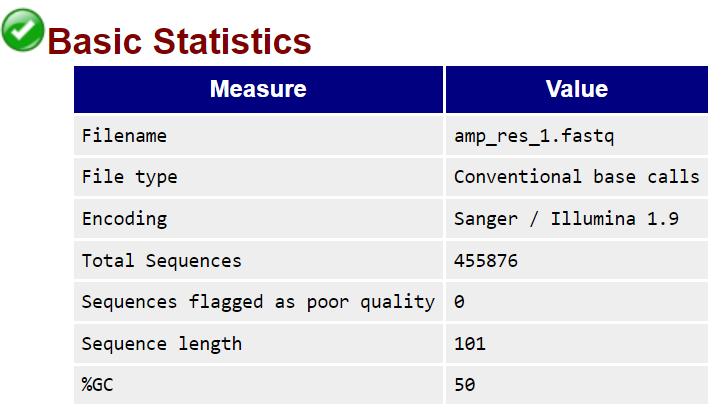

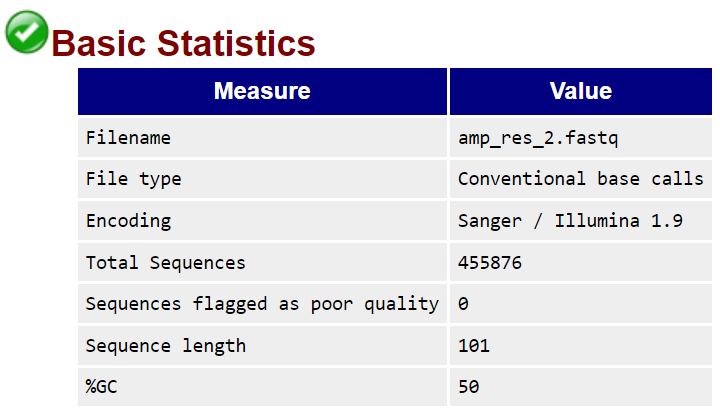

As for the forward reads, we have bad per sequence quality, which means 
that the sequence was initially sequenced with errors, so that quality scores per each base decreases to the end of the sequence (see the screenshot) - that is the range of quality values across all bases at each position. The same is for the second read. To fix it, we could cut several bases off the end of the reads.

**Read 1:**

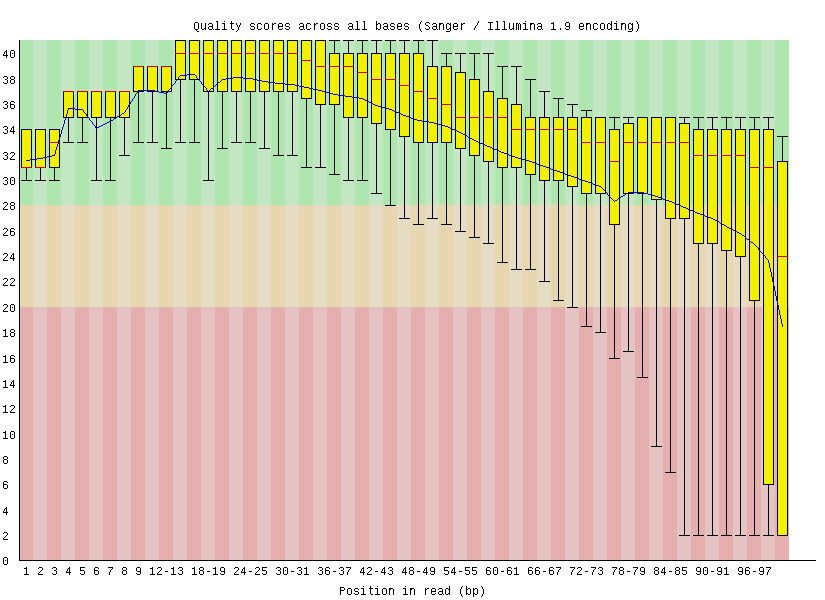

**Read 2:**

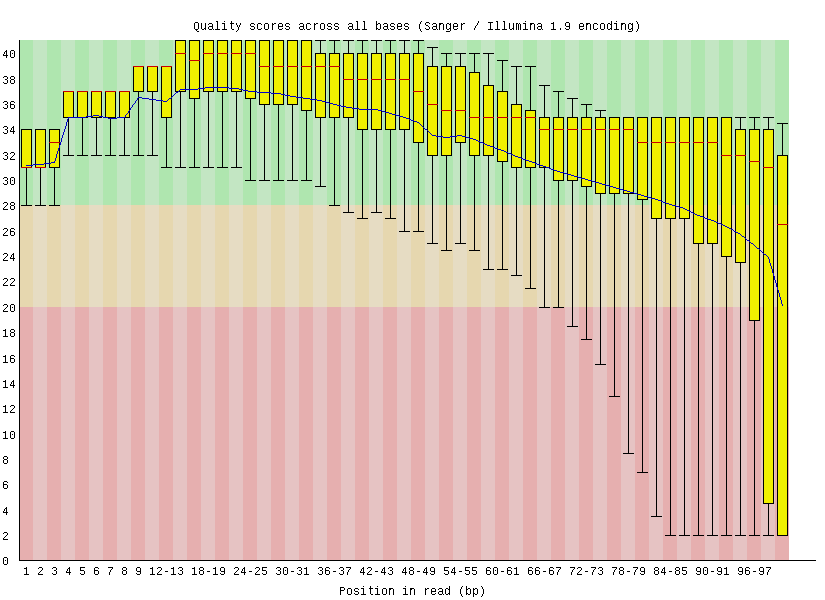

We also have troubles with Per tile sequence quality for the first read, by the way, this plot is specific for our task as we are working with Illumina. In manual it is stated that:

"The plot shows the deviation from the average quality for each tile. The colours are on a cold to hot scale, with cold colours being positions where the quality was at or above the average for that base in the run, and hotter colours indicate that a tile had worse qualities than other tiles for that base. In the example below you can see that certain tiles show consistently poor quality. A good plot should be blue all over."

In a nutshell, our plot should be blue, but it contains some coloured parts, which indicates of bad quality. If we compare it with the second read, we can see that the Per tile sequence quality there is not as bad, that is why it was not marked as terrible.

**Read 1**

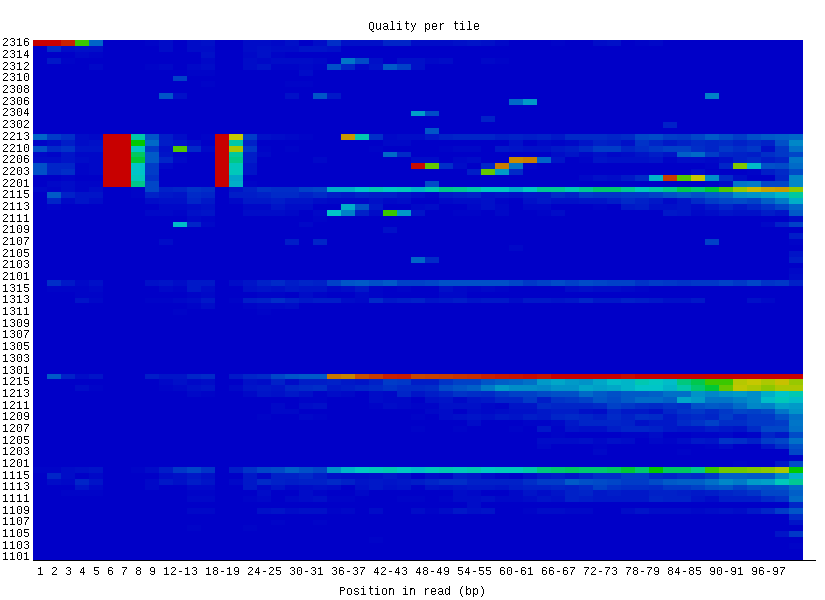

**Read 2**

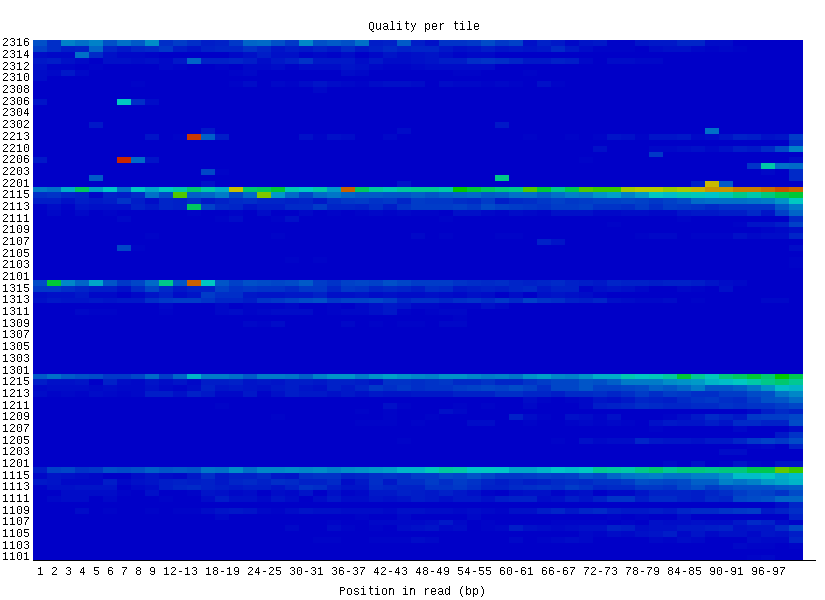

All in all, the other metrics are not that bad, but we can conclude that the given reads are not of the best quality by the end of the sequences, that is why it is a good idea to trim them! 

##  **4. (Optional, 1 bonus point) Filtering the reads**

In [9]:
!apt-get install trimmomatic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  trimmomatic
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 749 kB of archives.
After this operation, 795 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 trimmomatic all 0.36+dfsg-3 [749 kB]
Fetched 749 kB in 0s (7,117 kB/s)
Selecting previously unselected package trimmomatic.
(Reading database ... 124284 files and directories currently installed.)
Preparing to unpack .../trimmomatic_0.36+dfsg-3_all.deb ...
Unpacking trimmomatic (0.36+dfsg-3) ...
Setting up trimmomatic (0.36+dfsg-3) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [10]:
!TrimmomaticPE -threads 5 -phred33 /amp_res_1.fastq /amp_res_2.fastq /amp_res_1P.fastq /amp_res_1U.fastq /amp_res_2P.fastq  /amp_res_2U.fastq LEADING:20 TRAILING:20 SLIDINGWINDOW:10:20 MINLEN:20

TrimmomaticPE: Started with arguments:
 -threads 5 -phred33 /amp_res_1.fastq /amp_res_2.fastq /amp_res_1P.fastq /amp_res_1U.fastq /amp_res_2P.fastq /amp_res_2U.fastq LEADING:20 TRAILING:20 SLIDINGWINDOW:10:20 MINLEN:20
Input Read Pairs: 455876 Both Surviving: 446259 (97.89%) Forward Only Surviving: 9216 (2.02%) Reverse Only Surviving: 273 (0.06%) Dropped: 128 (0.03%)
TrimmomaticPE: Completed successfully


In [8]:
!wc -l /amp_res_1P.fastq
1785036 // 4 
# 446259 out of 455876 (~98%) reads passed the filtering


1785036 /amp_res_1P.fastq


446259

In [9]:
!wc -l /amp_res_2P.fastq
1785036 // 4
# the same for reverse reads

1785036 /amp_res_2P.fastq


446259

In [10]:
!fastqc -o . /amp_res_1P.fastq /amp_res_2P.fastq

/bin/bash: fastqc: command not found


Again the number of total sequences is the same as calculated manually.

**Read 1:**

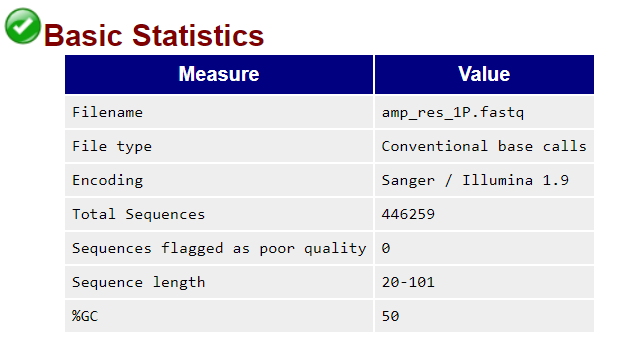

**Read 2:** 

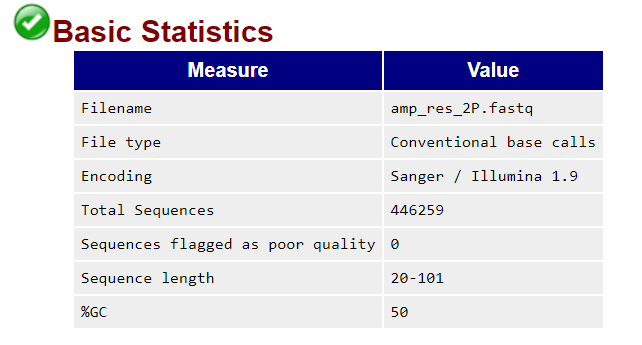

Per base sequence quality has improved and is marked as normal now.
**Read 1:**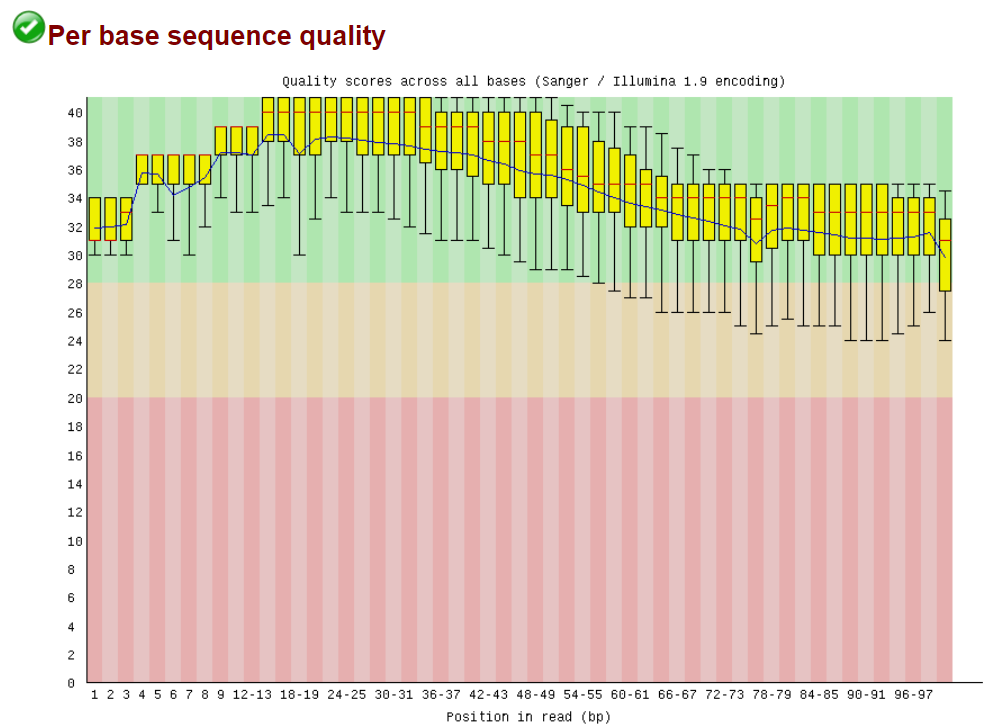

**Read 2:**

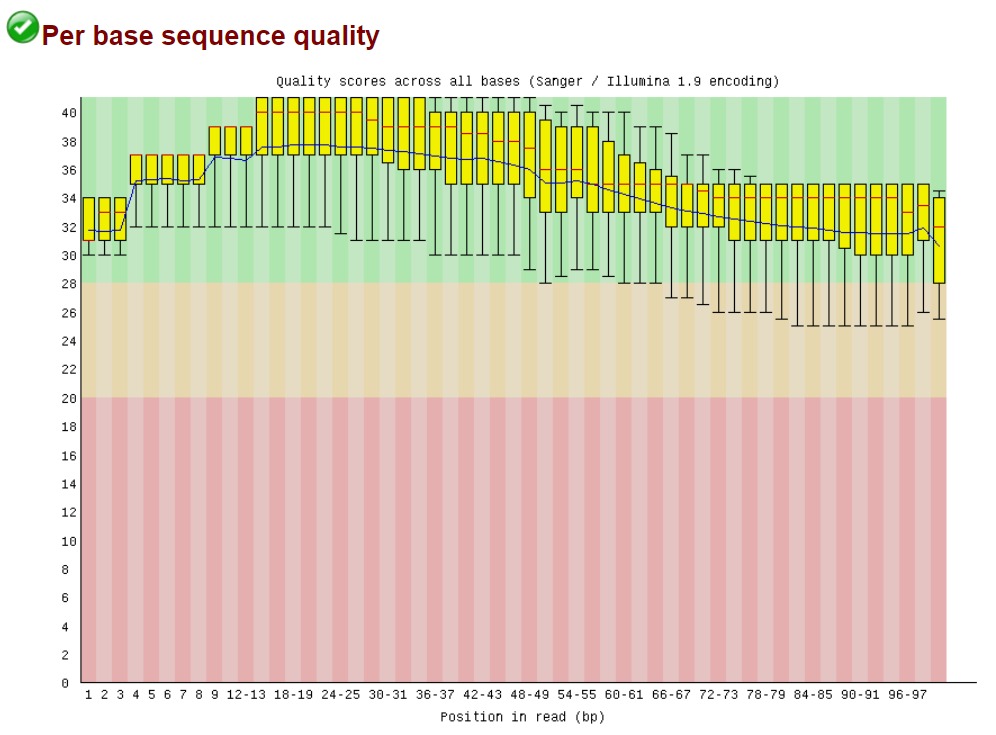

## **5. Aligning sequences to reference**

### **5.1 Index the reference file**

In [11]:
!apt-get install bwa

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  samtools
The following NEW packages will be installed:
  bwa
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 176 kB of archives.
After this operation, 404 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 bwa amd64 0.7.17-1ubuntu0.1 [176 kB]
Fetched 176 kB in 0s (2,212 kB/s)
Selecting previously unselected package bwa.
(Reading database ... 124309 files and directories currently installed.)
Preparing to unpack .../bwa_0.7.17-1ubuntu0.1_amd64.deb ...
Unpacking bwa (0.7.17-1ubuntu0.1) ...
Setting up bwa (0.7.17-1ubuntu0.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [12]:
!bwa index /content/GCF_000005845.2_ASM584v2_genomic.fna

[bwa_index] Pack FASTA... 0.04 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 1.46 seconds elapse.
[bwa_index] Update BWT... 0.03 sec
[bwa_index] Pack forward-only FASTA... 0.03 sec
[bwa_index] Construct SA from BWT and Occ... 0.53 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index /content/GCF_000005845.2_ASM584v2_genomic.fna
[main] Real time: 2.203 sec; CPU: 2.103 sec


### **5.2 Align your reads**

In [13]:
!bwa mem /content/GCF_000005845.2_ASM584v2_genomic.fna /amp_res_1P.fastq /amp_res_2P.fastq > amp_res.sam 

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 106336 sequences (10000178 bp)...
[M::process] read 108264 sequences (10000141 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (9, 51236, 0, 22)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (145, 185, 230)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 400)
[M::mem_pestat] mean and std.dev: (189.31, 63.57)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 485)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation RR...
[M::mem_pestat] (25, 50, 75) percentile: (114, 158, 263)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 561)
[M::mem_pestat] mean and std.dev: (131.82, 63.27)
[M::mem_pestat] low and high boundaries for pro

### **5.3. Compress SAM file**

In [14]:
!apt-get install -y samtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cwltool libc-ares2 libhts2 libjs-bootstrap nodejs nodejs-doc
  python-asn1crypto python-avro python-cachecontrol python-certifi
  python-cffi-backend python-chardet python-cryptography python-enum34
  python-html5lib python-idna python-ipaddress python-isodate python-lockfile
  python-mistune python-openssl python-pkg-resources python-pyparsing
  python-rdflib python-rdflib-jsonld python-requests python-ruamel.yaml
  python-schema-salad python-shellescape python-six python-sparqlwrapper
  python-typing python-urllib3 python-webencodings
Suggested packages:
  python-cryptography-doc python-cryptography-vectors python-enum34-doc
  python-genshi python-lxml python-lockfile-doc python-openssl-doc
  python-ope

In [15]:
!samtools view -S -b amp_res.sam > amp_res.bam

In [16]:
!samtools flagstat amp_res.bam

892776 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
258 + 0 supplementary
0 + 0 duplicates
891649 + 0 mapped (99.87% : N/A)
892518 + 0 paired in sequencing
446259 + 0 read1
446259 + 0 read2
888554 + 0 properly paired (99.56% : N/A)
890412 + 0 with itself and mate mapped
979 + 0 singletons (0.11% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


892776 reads in total 

891649 mapped (99.87%)


### **5.4 Sort and index BAM file**

In [17]:
!samtools sort amp_res.bam > amp_res.sorted.bam

In [18]:
!samtools index amp_res.sorted.bam

**IGV visualization**

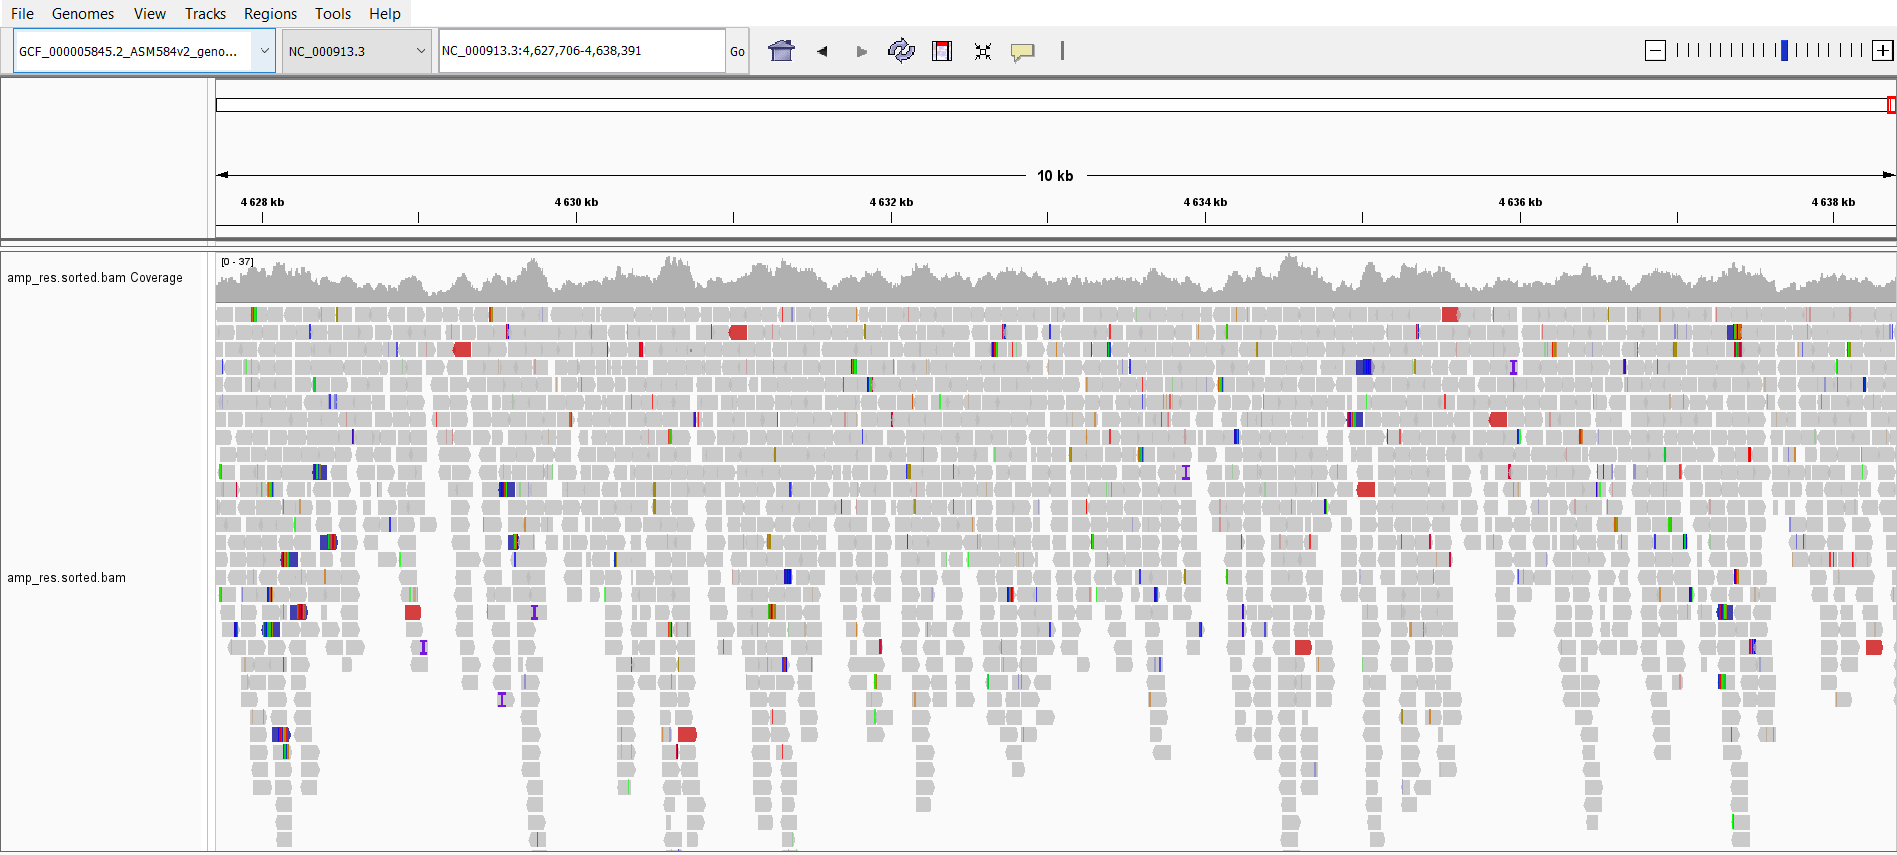

The coverage is more or less even. Some reads are coloured, such as reads marked in red or blue, which indicates anomalous insert sizes (possible evidence of an insertion or deletion). 'Green' reads imply structural events of duplications or translocations. Coloured bars within the read mark potential genetic alterations in the read against a reference sequence. 

## **6. Variant calling**

In [19]:
!samtools mpileup -f /content/GCF_000005845.2_ASM584v2_genomic.fna amp_res.sorted.bam >  my.mpileup

[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000


In [22]:
!wget https://downloads.sourceforge.net/project/varscan/VarScan.v2.3.9.jar

--2022-10-26 11:22:48--  https://downloads.sourceforge.net/project/varscan/VarScan.v2.3.9.jar
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Connecting to downloads.sourceforge.net (downloads.sourceforge.net)|204.68.111.105|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gigenet.dl.sourceforge.net/project/varscan/VarScan.v2.3.9.jar [following]
--2022-10-26 11:22:49--  https://gigenet.dl.sourceforge.net/project/varscan/VarScan.v2.3.9.jar
Resolving gigenet.dl.sourceforge.net (gigenet.dl.sourceforge.net)... 69.65.16.142
Connecting to gigenet.dl.sourceforge.net (gigenet.dl.sourceforge.net)|69.65.16.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111413 (109K) [application/java-archive]
Saving to: ‘VarScan.v2.3.9.jar’

VarScan.v2.3.9.jar  100%[===================>] 108.80K  --.-KB/s    in 0.06s   

2022-10-26 11:22:49 (1.76 MB/s) - ‘VarScan.v2.3.9.jar’ saved [111413/111413]



In [24]:
!java -jar VarScan.v2.3.9.jar

VarScan v2.3

USAGE: java -jar VarScan.jar [COMMAND] [OPTIONS] 

COMMANDS:
	pileup2snp		Identify SNPs from a pileup file
	pileup2indel		Identify indels a pileup file
	pileup2cns		Call consensus and variants from a pileup file
	mpileup2snp		Identify SNPs from an mpileup file
	mpileup2indel		Identify indels an mpileup file
	mpileup2cns		Call consensus and variants from an mpileup file

	somatic			Call germline/somatic variants from tumor-normal pileups
	copynumber			Determine relative tumor copy number from tumor-normal pileups
	readcounts		Obtain read counts for a list of variants from a pileup file

	filter			Filter SNPs by coverage, frequency, p-value, etc.
	somaticFilter		Filter somatic variants for clusters/indels
	fpfilter		Apply the false-positive filter

	processSomatic		Isolate Germline/LOH/Somatic calls from output
	copyCaller		GC-adjust and process copy number changes from VarScan copynumber output
	compare			Compare two lists of positions/variants
	limit			Restrict pileup/snp

In [25]:
!java -jar VarScan.v2.3.9.jar mpileup2snp -h

Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.01
USAGE: java -jar VarScan.jar mpileup2cns [pileup file] OPTIONS
	mpileup file - The SAMtools mpileup file

	OPTIONS:
	--min-coverage	Minimum read depth at a position to make a call [8]
	--min-reads2	Minimum supporting reads at a position to call variants [2]
	--min-avg-qual	Minimum base quality at a position to count a read [15]
	--min-var-freq	Minimum variant allele frequency threshold [0.01]
	--min-freq-for-hom	Minimum frequency to call homozygote [0.75]
	--p-value	Default p-value threshold for calling variants [99e-02]
	--strand-filter	Ignore variants with >90% support on one strand [1]
	--output-vcf	If set to 1, outputs in VCF format
	--vcf-sample-list	For VCF output, a list of sample names in order, one per line
	--variants	Report only variant (SNP/indel) positions [0]


In [26]:
!java -jar VarScan.v2.3.9.jar  mpileup2snp my.mpileup --min-var-freq 0.50 --variants --output-vcf 1 > VarScan_results.vcf

Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.5
Min avg qual:	15
P-value thresh:	0.01
Reading input from my.mpileup
4641343 bases in pileup file
9 variant positions (6 SNP, 3 indel)
1 were failed by the strand-filter
5 variant positions reported (5 SNP, 0 indel)


## **7. Variant effect prediction**

Now we know that we have discovered 5 mutations, so it's time to classify them.



1.   Missense in geneb0084

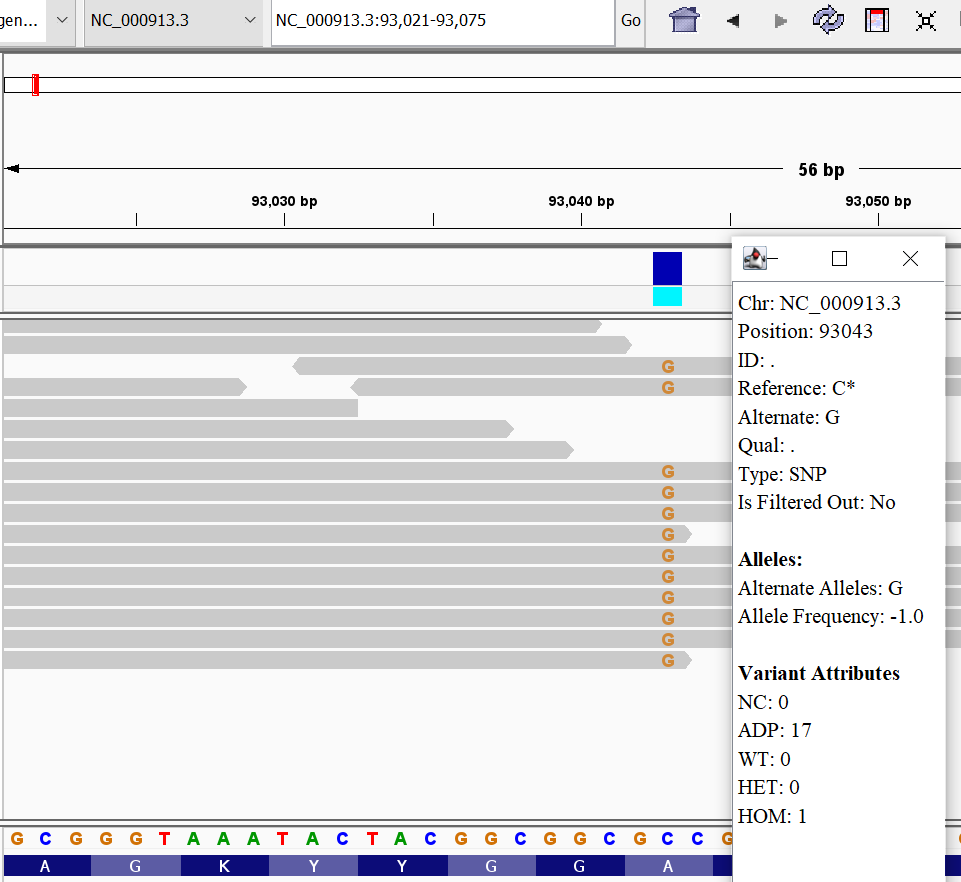



Okay this was just an example of how to do it manually, but I feel super exhausted after just 1 mutations so let's better jump to step 7.1...

### **7.1\*\*\* ADDENDUM Automatic SNP annotation**


In [28]:
!wget https://snpeff.blob.core.windows.net/versions/snpEff_latest_core.zip

--2022-10-26 11:53:14--  https://snpeff.blob.core.windows.net/versions/snpEff_latest_core.zip
Resolving snpeff.blob.core.windows.net (snpeff.blob.core.windows.net)... 52.239.234.228
Connecting to snpeff.blob.core.windows.net (snpeff.blob.core.windows.net)|52.239.234.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67191760 (64M) [application/zip]
Saving to: ‘snpEff_latest_core.zip’

snpEff_latest_core. 100%[===================>]  64.08M  33.5MB/s    in 1.9s    

2022-10-26 11:53:16 (33.5 MB/s) - ‘snpEff_latest_core.zip’ saved [67191760/67191760]



In [29]:
!unzip snpEff_latest_core.zip

Archive:  snpEff_latest_core.zip
   creating: snpEff/
  inflating: snpEff/LICENSE.md       
  inflating: snpEff/snpEff.jar       
  inflating: snpEff/SnpSift.jar      
   creating: snpEff/galaxy/
  inflating: snpEff/galaxy/snpSift_int.xml  
   creating: snpEff/galaxy/tool-data/
  inflating: snpEff/galaxy/tool-data/snpEff_genomes.loc  
  inflating: snpEff/galaxy/tool-data/snpEff_genomes.loc.sample  
  inflating: snpEff/galaxy/snpEffWrapper.pl  
  inflating: snpEff/galaxy/snpEff.xml  
  inflating: snpEff/galaxy/tool_conf.xml  
  inflating: snpEff/galaxy/snpSift_caseControl.xml  
  inflating: snpEff/galaxy/snpSift_filter.xml  
  inflating: snpEff/galaxy/snpSift_annotate.xml  
  inflating: snpEff/galaxy/snpSiftWrapper.pl  
  inflating: snpEff/galaxy/tool_dependencies.xml  
  inflating: snpEff/galaxy/snpEff_download.xml  
  inflating: snpEff/snpEff.config    
   creating: snpEff/examples/
  inflating: snpEff/examples/samples_cancer.txt  
  inflating: snpEff/examples/example_motif.vcf  
  in

In [30]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gbff.gz

--2022-10-26 11:57:33--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gbff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.230, 165.112.9.228, 2607:f220:41f:250::230, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421587 (3.3M) [application/x-gzip]
Saving to: ‘GCF_000005845.2_ASM584v2_genomic.gbff.gz’

GCF_000005845.2_ASM 100%[===================>]   3.26M  --.-KB/s    in 0.06s   

2022-10-26 11:57:34 (51.5 MB/s) - ‘GCF_000005845.2_ASM584v2_genomic.gbff.gz’ saved [3421587/3421587]



In [32]:
!gzip -d GCF_000005845.2_ASM584v2_genomic.gbff.gz

In [33]:
!touch snpEff.config

In [34]:
!echo 'k12.genome : ecoli_K12' > snpEff.config

In [36]:
!mkdir -p data/k12

In [37]:
!cp GCF_000005845.2_ASM584v2_genomic.gbff data/k12/genes.gbk

In [41]:
!java -jar /content/snpEff/snpEff.jar

SnpEff version SnpEff 5.1d (build 2022-04-19 15:49), by Pablo Cingolani
Usage: snpEff [command] [options] [files]

Run 'java -jar snpEff.jar command' for help on each specific command

Available commands: 
	[eff|ann]                    : Annotate variants / calculate effects (you can use either 'ann' or 'eff', they mean the same). Default: ann (no command or 'ann').
	build                        : Build a SnpEff database.
	buildNextProt                : Build a SnpEff for NextProt (using NextProt's XML files).
	cds                          : Compare CDS sequences calculated form a SnpEff database to the one in a FASTA file. Used for checking databases correctness.
	closest                      : Annotate the closest genomic region.
	count                        : Count how many intervals (from a BAM, BED or VCF file) overlap with each genomic interval.
	databases                    : Show currently available databases (from local config file).
	download                     : Download a

In [44]:
!java -jar /content/snpEff/snpEff.jar build -genbank -v k12

00:00:00 SnpEff version SnpEff 5.1d (build 2022-04-19 15:49), by Pablo Cingolani
00:00:00 Command: 'build'
00:00:00 Building database for 'k12'
00:00:00 Reading configuration file 'snpEff.config'. Genome: 'k12'
00:00:00 Reading config file: /content/snpEff.config
00:00:00 done
00:00:01 Chromosome: 'NC_000913.3'	length: 4641652
00:00:01 Create exons from CDS (if needed): 
..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [47]:
!java -jar /content/snpEff/snpEff.jar ann k12 VarScan_results.vcf > VarScan_results_annotated.vcf